# <span style="color:red"> Lecture 24 - Application of Text Data: Trigram Language Model  </span>

<font size = "4">

- Today's lecture will briefly discuss an application of text data: predictive language models

- This will just scratch the surface, and generative AI like ChatGPT uses much more sophisticated models.

- We will focus on the coding aspect, omitting almost all the probabilistic details. Check out DATASCI 340 or [this free textbook](https://web.stanford.edu/~jurafsky/slp3/) for more info

- We'll estimate a very simple probability distribution from a trigram (3-gram) language model, a specific case of the N-gram language model.

$\qquad$ <img src="files_lec24/trigram.png" alt="drawing" width="500"/>


<font size = "2">

(quote taken from Chapter 3 of the textbook linked above)



##### Import necessary libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##### Load in a dataset of hotel reviews and replace some awkwardly named columns

In [2]:
hotels = pd.read_csv("files_lec24/Datafiniti_Hotel_Reviews.csv")

hotels = hotels.rename(columns = {"reviews.text": "review", "reviews.rating":"rating"})

display(hotels)

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,rating,reviews.sourceURLs,review,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-03T00:00:00Z,2016-07-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,NaN,NaN,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
1,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-02T00:00:00Z,2016-08-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,NaN,NaN,D,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
2,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-11-15T00:00:00Z,2016-08-23T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,NaN,NaN,Ron,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
3,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,"2016-05-21T00:00:00Z,2016-07-31T00:00:00Z",2.0,https://www.tripadvisor.com/Hotel_Review-g4118...,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",Richmond,VA,jaeem2016,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...
4,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,2016-07-31T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g4118...,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,Laurel,MD,MamaNiaOne,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,AVwd4TMv_7pvs4fz-Ers,2016-03-24T11:44:15Z,2018-01-01T00:00:46Z,215 S Pacific St,"Hotel,Hotels,Lodging,Motels",Accommodation & Food Services,Rockaway Beach,US,us/or/rockawaybeach/215spacificst/-1035432852,45.611260,...,2016-03-23T00:00:00Z,3.0,http://www.tripadvisor.com/Hotel_Review-g52043...,It is hard for me to review an oceanfront hote...,Picture Window Ocean View!,Wildwood,GA,LASH0211,https://www.tripadvisor.com/Hotel_Review-g5204...,http://www.oregonsilversands.com
9996,AVwdRp4DIN2L1WUfuGZZ,2015-10-26T23:03:02Z,2018-01-01T00:00:44Z,669 Route 6a,"Hotel,Hotels",Accommodation & Food Services,East Sandwich,US,us/ma/eastsandwich/669route6a/-1480952475,41.729390,...,"2016-05-13T00:00:00Z,2016-03-21T00:00:00Z",4.0,https://www.tripadvisor.com/Hotel_Review-g4154...,"I live close by, and needed to stay somewhere ...","Clean, comfortable and quiet",East Sandwich,MA,Gennaker,https://www.tripadvisor.com/Hotel_Review-g4154...,http://www.sandyneck.com
9997,AVwd1TbkByjofQCxs6FH,2016-06-11T03:12:23Z,2018-01-01T00:00:44Z,702 W Appleway Ave,"Hotel,Hotel, Motel, and Building,Hotels,Lodg

<font size = "4">

- First, we will cover another aspect of regular expressions that we haven't seen yet.

- If we want to search the reviews for the word "this", we don't need to use any regular expression. Same if we want to search for the word "that".

In [3]:
this = hotels["review"].str.findall("this")
display(this)

that = hotels["review"].str.findall("that")
display(that)

0                 []
1             [this]
2                 []
3             [this]
4                 []
            ...     
9995          [this]
9996              []
9997              []
9998              []
9999    [this, this]
Name: review, Length: 10000, dtype: object

0           []
1           []
2           []
3           []
4           []
         ...  
9995    [that]
9996        []
9997        []
9998        []
9999        []
Name: review, Length: 10000, dtype: object

<font size = "4">

- But what if we want to search reviews for **either** one of the words?

- Both words start with "th". Then we need to look for either "is" or "at".

- We can imagine searching one character at a time:

    - Look for "t"
    - Look for "h"
    - Look for either "i" or "a"
    - Look for either "s" or "t"

- We can put brackets around the character choices like we do below:

In [4]:
this_that = hotels["review"].str.findall("th[ia][st]")

this_that

0                 []
1             [this]
2                 []
3             [this]
4                 []
            ...     
9995    [this, that]
9996              []
9997              []
9998              []
9999    [this, this]
Name: review, Length: 10000, dtype: object

<font size = "4">

- We also might want to ignore capitalization and find words starting with both "T" and "t"

In [5]:
this_that = hotels["review"].str.findall("[Tt]h[ia][st]")
this_that

0                 []
1             [this]
2             [This]
3             [this]
4                 []
            ...     
9995    [this, that]
9996              []
9997              []
9998              []
9999    [this, this]
Name: review, Length: 10000, dtype: object

<font size = "4">

**Full disclosure:** The code we have above would also find the words "thit" and "thas". If we're confident there are no mispellings, we don't have to worry. Of course, it's not a good idea to be so trusting in general.

## <span style="color:red"> I. Find all individual words </span>

<font size = "4">

- We will search for **all** words of any kind. This will convert each review into a list of individual words.

- Therefore, we should search for one or more consecutive occurrences of strings containing the characters A thru Z, a thru z, and a single apostrophe (to cover words like "don't").

- We will extract each individual word (a.k.a token) from the "review" column.



In [6]:
hotels["tokens"] = hotels["review"].str.findall("[A-Za-z']+")

display(hotels[["review", "tokens"]])

,review,tokens
0,Our experience at Rancho Valencia was absolute...,"[Our, experience, at, Rancho, Valencia, was, a..."
1,Amazing place. Everyone was extremely warm and...,"[Amazing, place, Everyone, was, extremely, war..."
2,We booked a 3 night stay at Rancho Valencia to...,"[We, booked, a, night, stay, at, Rancho, Valen..."
3,Currently in bed writing this for the past hr ...,"[Currently, in, bed, writing, this, for, the, ..."
4,I live in Md and the Aloft is my Home away fro...,"[I, live, in, Md, and, the, Aloft, is, my, Hom..."
...,...,...
9995,It is hard for me to review an oceanfront hote...,"[It, is, hard, for, me, to, review, an, oceanf..."
9996,"I live close by, and needed to stay somewhere ...","[I, live, close, by, and, needed, to, stay, so..."
9997,Rolled in 11:30 laid out heads down woke up to...,"[Rolled, in, laid, out, heads, down, woke, up,..."
9998,Absolutely terrible..I was told I was being gi...,"[Absolutely, terrible, I, was, told, I, was, b..."


<font size = "4">

- At this point, we will convert all letters to lowercase. We do not want to treat the word "we" and "We" differently.

In [7]:
def lower_list(lst):
    # Input "lst" will correspond to the list in each entry of "tokens" column

    out = []

    # If there is a missing value (NaN) in the "review" column,
    # there will be a NaN in the "tokens" column too.
    # So this if statement checks for NaN's
    if not isinstance(lst, list):
        return out

    # Loop over list, convert strings to lowercase and append to output list
    for w in lst:
        out.append(w.lower())
    return out

# Use .apply() on the "tokens column"
hotels["tokens"] = hotels["tokens"].apply(lower_list)
hotels["tokens"]


0       [our, experience, at, rancho, valencia, was, a...
1       [amazing, place, everyone, was, extremely, war...
2       [we, booked, a, night, stay, at, rancho, valen...
3       [currently, in, bed, writing, this, for, the, ...
4       [i, live, in, md, and, the, aloft, is, my, hom...
                              ...                        
9995    [it, is, hard, for, me, to, review, an, oceanf...
9996    [i, live, close, by, and, needed, to, stay, so...
9997    [rolled, in, laid, out, heads, down, woke, up,...
9998    [absolutely, terrible, i, was, told, i, was, b...
9999    [filthy, outdated, noisy, neighbours, but, thi...
Name: tokens, Length: 10000, dtype: object

## <span style="color:red"> II. Construct trigrams </span>

<font size = "4">

- We now want to construct "trigrams" from the list of words, which are simply collections of three consecutive words.

- So for the sentence "this was a very bad hotel", we would collect the trigrams:
    - (this, was, a)
    - (was, a, very)
    - (a, very, bad)
    - (very, bad, hotel)

- We will collect each trigram in a **tuple**, not a list. A tuple is very similar to a list, and is defined using "()" instead of "[]".

- The reason for using tuples instead of lists is technical, but tuples can be used as the Index column of a DataFrame/Series, while lists cannot. We will need to do this later in the notebook.

- Here is an example for the first review, where we collect a **list of tuples** (list of trigrams)

In [8]:
words = hotels["tokens"].iloc[0]
print(words)
N = len(words)

trigram_list = []
for i in range(N-2):
    trigram = (words[i], words[i+1], words[i+2]) # "()" means this is a tuple 
    trigram_list.append(trigram)

trigram_list

['our', 'experience', 'at', 'rancho', 'valencia', 'was', 'absolutely', 'perfect', 'from', 'beginning', 'to', 'end', 'we', 'felt', 'special', 'and', 'very', 'happy', 'during', 'our', 'stayed', 'i', 'would', 'come', 'back', 'in', 'a', 'heart', 'beat']


[('our', 'experience', 'at'),
 ('experience', 'at', 'rancho'),
 ('at', 'rancho', 'valencia'),
 ('rancho', 'valencia', 'was'),
 ('valencia', 'was', 'absolutely'),
 ('was', 'absolutely', 'perfect'),
 ('absolutely', 'perfect', 'from'),
 ('perfect', 'from', 'beginning'),
 ('from', 'beginning', 'to'),
 ('beginning', 'to', 'end'),
 ('to', 'end', 'we'),
 ('end', 'we', 'felt'),
 ('we', 'felt', 'special'),
 ('felt', 'special', 'and'),
 ('special', 'and', 'very'),
 ('and', 'very', 'happy'),
 ('very', 'happy', 'during'),
 ('happy', 'during', 'our'),
 ('during', 'our', 'stayed'),
 ('our', 'stayed', 'i'),
 ('stayed', 'i', 'would'),
 ('i', 'would', 'come'),
 ('would', 'come', 'back'),
 ('come', 'back', 'in'),
 ('back', 'in', 'a'),
 ('in', 'a', 'heart'),
 ('a', 'heart', 'beat')]

<font size = "4">

- Now we use ``.apply()`` to perform this for every review.

- I've provided different versions of the "get_trigrams" function, all do exactly the same thing.

In [9]:
def get_trigrams(words):
    N = len(words)
    trigram_list = []
    for i in range(N-2):
        trigram = (words[i], words[i+1], words[i+2])
        trigram_list.append(trigram)
    return trigram_list

#### 3 other equivalent versions of this function below

def get_trigrams2(words):
    trigram_list = []
    for i in range(len(words) - 2):
        three_words = words[i:i+3]   # using slicing with ":"
        trigram = tuple(three_words) # convert to tuple
        trigram_list.append(trigram) 
    return trigram_list

def get_trigrams3(words):
    trigram_list = []
    for i in range(len(words) - 2):
        trigram_list.append(tuple(words[i:i+3]))
    return trigram_list

def get_trigrams4(words):
    return [tuple(words[i:i+3]) for i in range(len(words) - 2)] # list comprehension



hotels["trigrams"] = hotels["tokens"].apply(get_trigrams)
hotels["trigrams"]

0       [(our, experience, at), (experience, at, ranch...
1       [(amazing, place, everyone), (place, everyone,...
2       [(we, booked, a), (booked, a, night), (a, nigh...
3       [(currently, in, bed), (in, bed, writing), (be...
4       [(i, live, in), (live, in, md), (in, md, and),...
                              ...                        
9995    [(it, is, hard), (is, hard, for), (hard, for, ...
9996    [(i, live, close), (live, close, by), (close, ...
9997    [(rolled, in, laid), (in, laid, out), (laid, o...
9998    [(absolutely, terrible, i), (terrible, i, was)...
9999    [(filthy, outdated, noisy), (outdated, noisy, ...
Name: trigrams, Length: 10000, dtype: object

## <span style="color:red"> III. Unravel trigrams into a single Pandas Series </span>

<font size = "4">

- The "trigrams" column has 10,000 rows and each row has one or more trigrams in them. 

- Rows corresponding to shorter reviews will have fewer trigrams.

- We now use the ``.explode()`` to "unravel" this column into a single Pandas series containing **all** the trigrams.

In [10]:
all_trigrams = hotels["trigrams"].explode()
display(all_trigrams)

0             (our, experience, at)
0          (experience, at, rancho)
0            (at, rancho, valencia)
0           (rancho, valencia, was)
0       (valencia, was, absolutely)
                   ...             
9999             (enemy, next, day)
9999                (next, day, we)
9999              (day, we, needed)
9999          (we, needed, medical)
9999        (needed, medical, help)
Name: trigrams, Length: 570085, dtype: object

## <span style="color:red"> IV. Compute probability distribution of trigrams </span>

<font size = "4">

- We can use the ``.value_counts`` method to see the most common trigrams appearing in all the reviews.

In [11]:
all_trigrams.value_counts()

trigrams
(the, room, was)              963
(the, front, desk)            671
(the, staff, was)             613
(the, hotel, is)              420
(the, hotel, was)             411
                             ... 
(for, travelers, who)           1
(convient, for, travelers)      1
(was, convient, for)            1
(which, was, convient)          1
(needed, medical, help)         1
Name: count, Length: 363387, dtype: int64

<font size = "4">

- However, language models are **probabilistic** in nature. 

- Instead of value counts, we would like a probability distribution.

- Instead of counting how many times a trigram appears, we should calculate its **proportion** of appearances.

- This can be done by passing ``normalize = True`` into the ``.value_counts`` method.

In [12]:
tri_probs = all_trigrams.value_counts(normalize = True)
tri_probs

trigrams
(the, room, was)              0.001689
(the, front, desk)            0.001177
(the, staff, was)             0.001075
(the, hotel, is)              0.000737
(the, hotel, was)             0.000721
                                ...   
(for, travelers, who)         0.000002
(convient, for, travelers)    0.000002
(was, convient, for)          0.000002
(which, was, convient)        0.000002
(needed, medical, help)       0.000002
Name: proportion, Length: 363387, dtype: float64

<font size = "4">

Let's make a barplot of the probabilities of the top 15 trigrams appearing in the reviews:

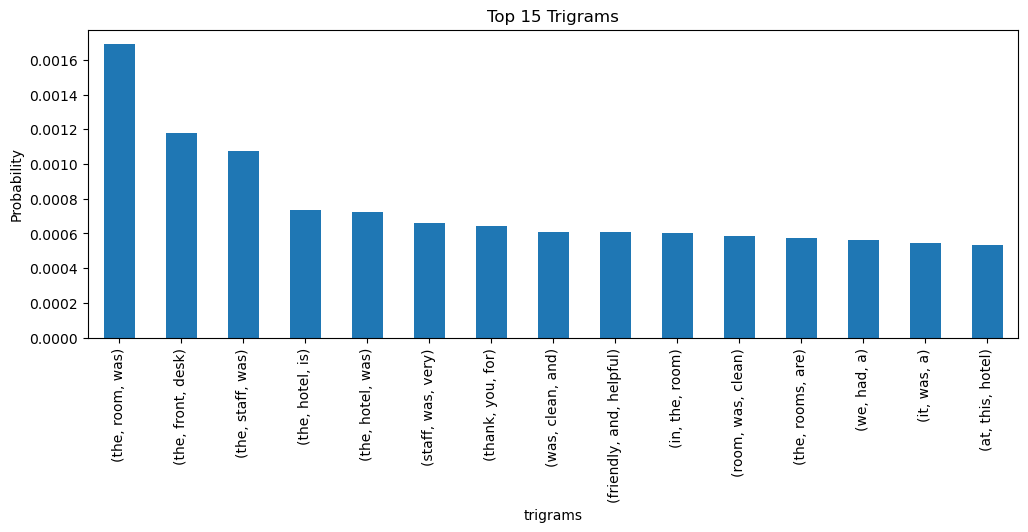

In [13]:
tri_probs.head(15).plot(kind='bar', figsize=(12,4))
plt.title("Top 15 Trigrams")
plt.ylabel("Probability")
plt.show()

## <span style="color:red"> V. Predict next word </span>

<font size = "4">

- Suppose we want to continue the phrase "We thought the room ...".

- Since we are using the trigram language model, we need to base our decision on the last two words: (the, room, ????)

- What is the most probable next word? 

- **Note:** Since "trigrams" is the index column, we cannot use the ``.apply`` method. However, there is a very similar ``.index.map()`` method.

In [14]:
prefix = ("the", "room") # predict next word based on these two

def check_for_prefix(trigram):
    # True or False: first two elements of trigram are "the" and "room"
    return trigram[:2] == prefix

bool_prefix = tri_probs.index.map(check_for_prefix)
candidate_trigrams = tri_probs[bool_prefix]

display(candidate_trigrams.sort_values(ascending = False))

trigrams
(the, room, was)          0.001689
(the, room, and)          0.000188
(the, room, is)           0.000144
(the, room, we)           0.000114
(the, room, had)          0.000112
                            ...   
(the, room, initially)    0.000002
(the, room, takes)        0.000002
(the, room, didnot)       0.000002
(the, room, trying)       0.000002
(the, room, dcor)         0.000002
Name: proportion, Length: 292, dtype: float64

<font size = "4">

**Note:** Sometimes I write very inefficient Python code, just to make it more readable to students. The following cell does the same thing:

In [15]:
candidates = tri_probs[tri_probs.index.map(lambda x: x[:2] == ('the', 'room'))]

candidates.sort_values(ascending = False)

trigrams
(the, room, was)          0.001689
(the, room, and)          0.000188
(the, room, is)           0.000144
(the, room, we)           0.000114
(the, room, had)          0.000112
                            ...   
(the, room, initially)    0.000002
(the, room, takes)        0.000002
(the, room, didnot)       0.000002
(the, room, trying)       0.000002
(the, room, dcor)         0.000002
Name: proportion, Length: 292, dtype: float64

<font size = "4">

- **Q:** Do the the entries of ``candidates`` represent a true probability distribution? Remember that language models are probabilistic.

- How can I check?

- If it's not, how can I make it a probability distribution?

In [16]:
# Check if it is a probability distribution.
# If it isn't, make the necessary change

# ????

print(candidates.sum())

candidates = candidates.sort_values(ascending = False) / candidates.sum()

candidates

print(candidates.sum())

0.003929755618322486
0.9999999999999999


## <span style="color:red"> VI. Practice quiz </span>

We will use the dataset of the top 1000 movies according to imdb.com (as of 2020).

In [17]:
df = pd.read_csv("files_lec24/imdb_top_1000.csv")

# Q1 

<font size = "4">

- The "Genre" column describes the category or categories of each movie in the dataset. 

- Each movie can have one or more genres. For example "The Shawshank Redemption" is classified as "Drama", while "The Dark Knight" is classified as "Action, Crime, Drama"

- One of the genres is "Animation". Using a **single Pandas method**, replace all appearances of the string "Animation" with the new string "Animated".

- For example, the 23rd ranked movie "Sen to Chihiro no kamikakushi" is originally classified as "Animation, Adventure, Family". After you perform the replacement correctly, it will be classified as "Animated, Adventure, Family". 

In [18]:
# SOLUTION

df["Genre"] = df["Genre"].str.replace("Animation", "Animated")

# Q2

- Create a new DataFrame called ``df_music`` that only contains movies that are classified as "Music".

- "Music" does not have to be the only genre for each movie. For example, your DataFrame should include the 34th ranked movie "Whiplash", which is classified as "Drama, Music"

- **Using Python commands**, print the number of movies that have the "Music" classification as part of their genre.

## <span style="color:red"> Note </span>

- I was careless when writing this question because it requires another special character we haven't seen.

- There are movies that are classified as "Music" and "Musical". If we just use the string "Music", both genres will be included.

- We need to add a "boundary" after the letter "c" so that other trailing characters are not included. This is done by typing "\\\b"

In [22]:
# SOLUTION
df_music = df[df["Genre"].str.contains("Music\\b")]
num_music = len(df_music)
print(num_music)

35


# Q3

- The "Overview" column contains a text description of each movie.

- Define a Pandas Series containing all appearances of the two words "scent" and "sent". It should **only** include cases where a match is found.

- To search for the words, use ``.str.findall`` **one time**.

- To remove the rows where no matches are found, use ``.str.len`` **one time**.

In [24]:
# SOLUTION

answer = df["Overview"].str.findall("sc?ent")

answer = answer[answer.str.len() > 0]
display(answer)

32           [sent]
39           [sent]
47           [sent]
53           [sent]
123          [sent]
286          [sent]
288          [sent]
300          [sent]
315          [sent]
393          [sent]
410    [sent, sent]
418          [sent]
422          [sent]
433         [scent]
485          [sent]
486          [sent]
555          [sent]
576          [sent]
630          [sent]
634          [sent]
680          [sent]
703          [sent]
728          [sent]
765          [sent]
960          [sent]
Name: Overview, dtype: object

# Q4

- The "Overview" column contains a text description of each movie.

- Define a Pandas Series containing all appearances of the two words "England" and "English". It should **only** include cases where a match is found.

- To search for the words, use ``.str.findall`` **one time**.

- To remove the rows where no matches are found, use ``.str.len`` **one time**.

In [27]:
# SOLUTION

# technically
answer = df["Overview"].str.findall("Engl[ai][ns][dh]")

answer = answer[answer.str.len() > 0]
display(answer)


# technically, the following is better
answer_better = df["Overview"].str.findall("(England|English)")
answer_better = answer_better[answer_better.str.len() > 0]


102    [England]
116    [English]
153    [English]
263    [English]
281    [England]
338    [English]
530    [England]
594    [English]
598    [England]
832    [English]
914    [England]
Name: Overview, dtype: object

# Q5

- Using ``.str.findall`` and ``.apply``, convert all strings from the "Genre" column into **tuples** of individual words.

- For example, the top 3 ranked movies (The Shawshank Redemption, The Godfather, The Dark Knight) are classified as "Drama", "Crime, Drama", "Action, Crime, Drama", respectively. After converting to tuples, they would read:

    - ("Drama")
    - ("Crime", "Drama")
    - ("Action", "Crime", "Drama")

- Each string in the tuple should be **lowercase only**

- Save this Pandas Series of tuples as a new column to the DataFrame ``df`` with the name "tokens".

- **Warning:** There are two genres with a dash: "Sci-Fi" and "Film-Noir". Make sure that the row corresponding to "Inception" has the tuple ("action", "adventure", "sci-fi") instead of the tuple ("action", "adventure", "sci", "fi")

In [28]:
# SOLUTION

df["tokens"] = df["Genre"].str.findall("[A-Za-z'-]+")

def lower_list(lst):
    out = []
    if not isinstance(lst, list):
        return tuple(out)
    for w in lst:
        out.append(w.lower())
    return tuple(out)

df["tokens"] = df["tokens"].apply(lower_list)
df["tokens"]

0                        (drama,)
1                  (crime, drama)
2          (action, crime, drama)
3                  (crime, drama)
4                  (crime, drama)
                  ...            
995      (comedy, drama, romance)
996              (drama, western)
997         (drama, romance, war)
998                  (drama, war)
999    (crime, mystery, thriller)
Name: tokens, Length: 1000, dtype: object

# Q6

- After Q5, the column df["tokens"] is a Pandas Series of length 1,000. Each row has a single tuple containing one or more strings.

- Create a new Pandas Series called ``genre_appearances`` where each row consists of a **single string**, one for each individual string appearing in df["tokens"].

- To be clear, the first 3 rows of df["tokens"] will be:

    |  | tokens |
    | --- | --- |
    | 0 | ("drama",) |
    | 1 | ("crime", "drama") |
    | 2 | ("action", "crime", "drama") |
    | ⋮ | ⋮ |

    while the first 6 rows of ``genre_appearances`` will be:

    |  | tokens |
    | --- | --- |
    | 0 | drama |
    | 1 | crime |
    | 1 | drama |
    | 2 | action |
    | 2 | crime |
    | 2 | drama |
    | ⋮ | ⋮ |

</br>

- Create a Pandas Series called ``genre_probs`` containing the probabilities/proportions of each genre appearing in the dataset.

- Generate a bar plot showing the probabilities/proportions of **all** genres appearing in the dataset. Add a title and label the y-axis.


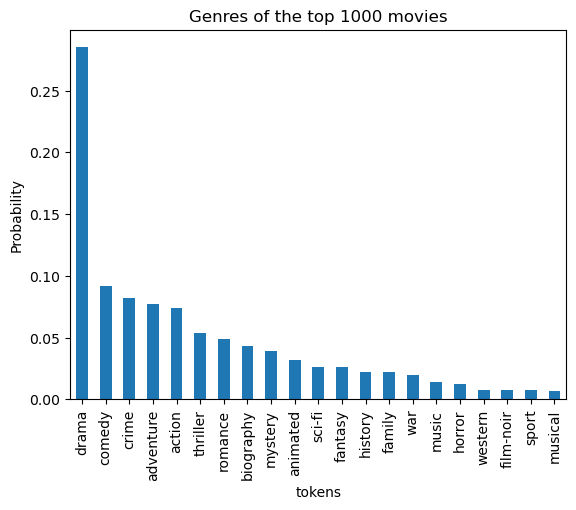

In [29]:
# SOLUTION

genre_appearances = df["tokens"].explode()

genre_probs = genre_appearances.value_counts(normalize = True)
genre_probs.plot(kind = "bar")
plt.title("Genres of the top 1000 movies")
plt.ylabel("Probability")
plt.show()